In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BlackFriday.csv')
df.head()

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# 1. <u><font color = 'red'>Dataset Walkthrough</font></u>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']                # Removing these product categories due to large no. of null values 
del df['Product_Category_3']

# 2. <u><font color = 'red'>Analysing Columns</font></u>

### 2.1) No. of Unique entries in each column

In [5]:
for col in df.columns:                      
    print(df[col].nunique(), '\t:',col)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


### 2.2) Unique entries in each category/column

In [6]:
dict = {}                              
for col in df.columns:
    dict[col] = df[col].unique()
    
dict

{'User_ID': array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
       dtype=int64),
 'Product_ID': array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
        'P00295642', 'P00091742'], dtype=object),
 'Gender': array(['F', 'M'], dtype=object),
 'Age': array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
       dtype=object),
 'Occupation': array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6], dtype=int64),
 'City_Category': array(['A', 'C', 'B'], dtype=object),
 'Stay_In_Current_City_Years': array(['2', '4+', '3', '1', '0'], dtype=object),
 'Marital_Status': array([0, 1], dtype=int64),
 'Product_Category_1': array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
         9], dtype=int64),
 'Purchase': array([ 8370, 15200,  1422, ..., 14539, 11120, 18426], dtype=int64)}

# 3. <u><font color = 'red'> Analysing Gender</font><u>

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

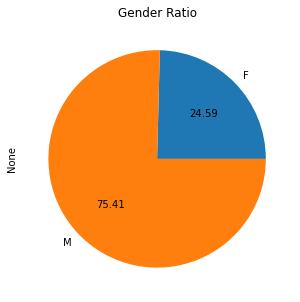

In [7]:
df.groupby('Gender').size().plot( kind    = 'pie', 
                                  y       = 'Ratio', 
                                  figsize = (8,5), 
                                  autopct = '%.2f', 
                                  title   = 'Gender Ratio' )

### 3.1 Total amount purchased by each category in Gender

<AxesSubplot:ylabel='Purchase'>

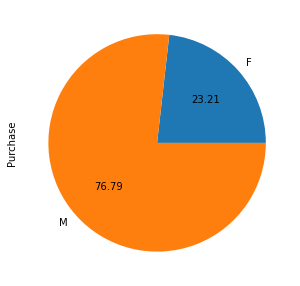

In [8]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = '%.2f', figsize = (8,5))

### 3.2 Average amount purchased by each category in Gender

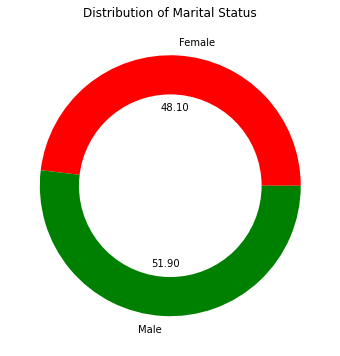

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))                    # Set the figure size

ax.pie( x       = df.groupby('Gender').mean()['Purchase'],       # Creating pie chart
        labels  = ['Female', 'Male'], 
        autopct = '%.2f', 
        colors  = ['red', 'green'] )

centre_circle = plt.Circle((0, 0), 0.70, fc='white')       # Drawing circle
fig = plt.gcf()                                            # Retrieve current figure object and assign it to fig
ax.add_artist(centre_circle)

ax.set_title('Distribution of Marital Status')             # Add a title

plt.show()

# 4. <u><font color = 'red'>Analysing Age and Marital Status</font></u>

### 4.1 Purchase distribution by Age

<AxesSubplot:title={'center':'Purchase distribution by Age'}, xlabel='Age'>

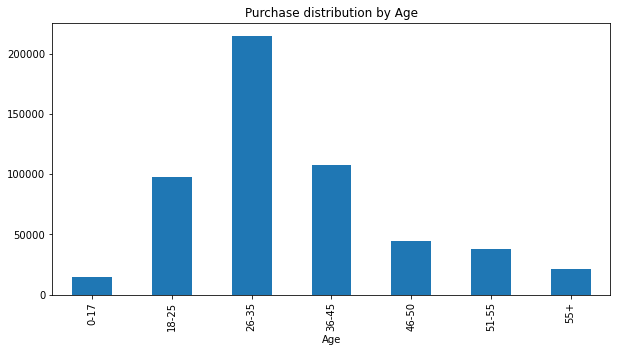

In [10]:
df.groupby('Age').size().plot(kind = 'bar', 
                              figsize = (10,5), 
                              title = 'Purchase distribution by Age')

### 4.2 Unique products purchased in different age groups

#### 4.2.1 Naive Method -  using loops

In [11]:
data = []

for age_grp in df['Age'].unique():
    data.append(df[df['Age'] == age_grp]['Product_ID'].nunique())
    
data = np.array(data)
data = data.reshape(1,7)
pd.DataFrame(data = data, columns = df['Age'].unique())

,0-17,55+,26-35,46-50,51-55,36-45,18-25
0,2300,2573,3419,3099,2877,3318,3213


#### 4.2.2 Efficient Method - using groupby function

In [12]:
data = {'Products' : df.groupby('Age')['Product_ID'].nunique()}
pd.DataFrame(data)

,Products
Age,
0-17,2300
18-25,3213
26-35,3419
36-45,3318
46-50,3099
51-55,2877
55+,2573


### 4.3 Total amount purchased by each age group

<AxesSubplot:title={'center':'Purchasing power of each age-group'}, xlabel='Age'>

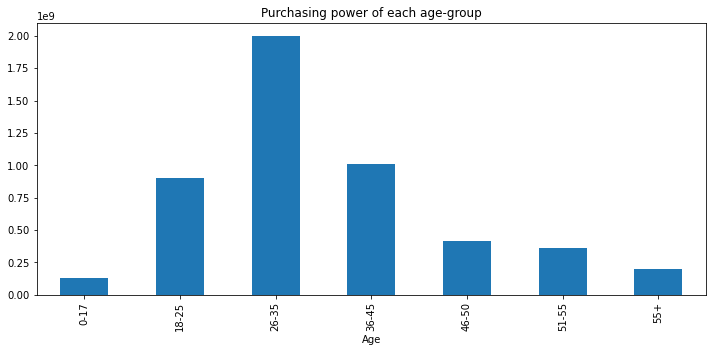

In [13]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12,5), title = 'Purchasing power of each age-group')

### 4.4 Average amount purchased by each age group

<AxesSubplot:title={'center':'Average Purchasing power of each age-group'}, ylabel='Purchase'>

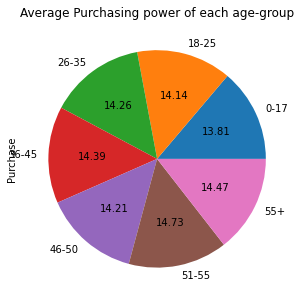

In [14]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', 
                                          figsize = (12,5), 
                                          autopct = '%.2f',
                                          title = 'Average Purchasing power of each age-group')

### 4.5 Marital Status Distribution

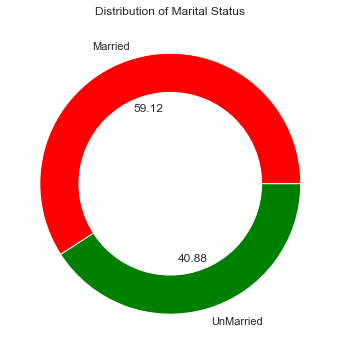

In [41]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Creating pie chart
ax.pie(x       = df.groupby('Marital_Status').size(), 
       labels  = ['Married', 'UnMarried'], 
       autopct = '%.2f',
       colors  = ['red', 'green'] )

# Drawing circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()                                       # Retrieve current figure object and assign it to fig
ax.add_artist(centre_circle)

# Add a title
ax.set_title('Distribution of Marital Status')

plt.show()

# 5. <u><font color = 'red'>Analysing multiple columns</font></u>

### 5.1) Which city to be targetted more ?

<AxesSubplot:xlabel='City_Category', ylabel='count'>

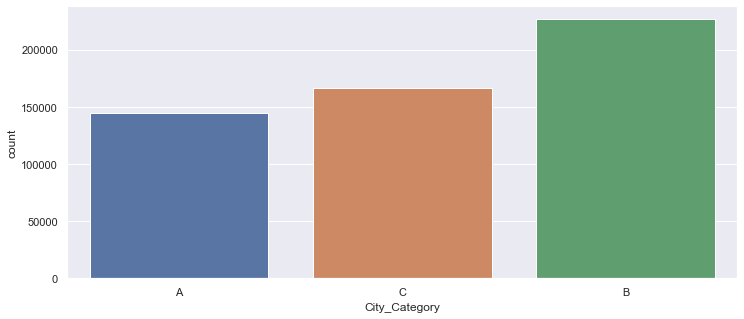

In [99]:
sns.set(rc = {'figure.figsize' : (12,5)})
sns.countplot(x = df['City_Category'])

### 5.2) Which city is having maximum amount of products purchased ?

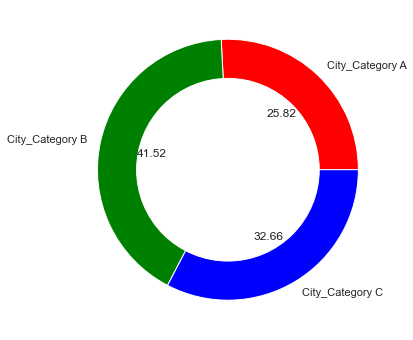

In [95]:
fig, ax = plt.subplots(figsize = (10,6))

ax.pie(x = df.groupby('City_Category').sum()['Purchase'],
       autopct = '%.2f',
       labels = ['City_Category A', 'City_Category B', 'City_Category C'],
       colors = ['red', 'green', 'blue'])

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')

ax.add_artist(centre_circle)

### 5.3) Which city is having more no. of items purchased ?

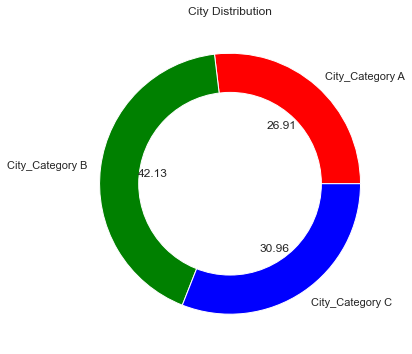

In [36]:
# Another Method
fig, ax = plt.subplots(figsize = (10,6))

ax.pie(x = df.groupby('City_Category').size(),
       autopct = '%.2f',
       labels = ['City_Category A', 'City_Category B', 'City_Category C'],
       colors = ['red', 'green', 'blue'])
    
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
ax.add_artist(centre_circle)

ax.set_title('City Distribution')

plt.show()

### 5.4) Which Occupation to be targetted more in which city ?

<AxesSubplot:xlabel='City_Category', ylabel='count'>

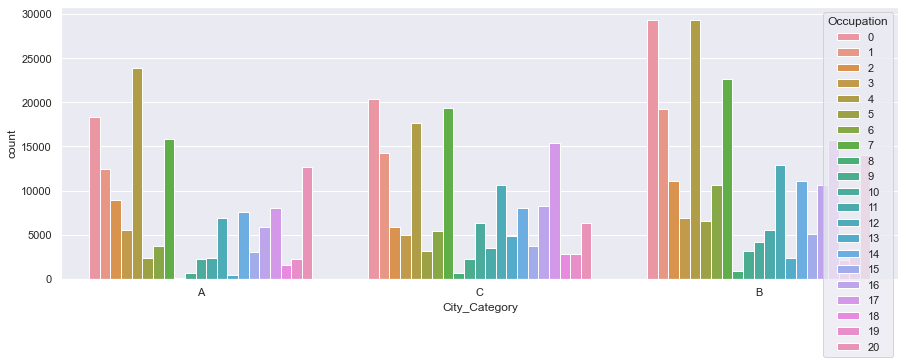

In [39]:
sns.set(rc = {'figure.figsize' : (15,5)})
sns.countplot(x = df['City_Category'], hue = df['Occupation'])

### 5.5) Which age group is purchasing more in which city ?

<AxesSubplot:xlabel='City_Category', ylabel='count'>

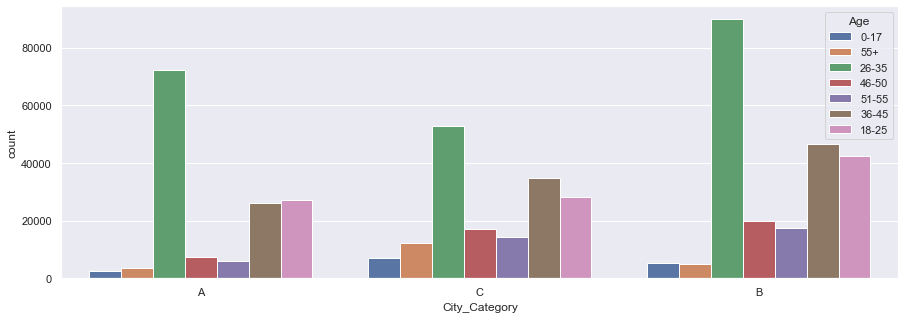

In [46]:
sns.set(rc = {'figure.figsize' : (15,5)})
sns.countplot(x = df['City_Category'], hue = df['Age'])

### 5.6) Who are purchasing more in different cities - Unmarried or Married ?

<AxesSubplot:xlabel='City_Category', ylabel='count'>

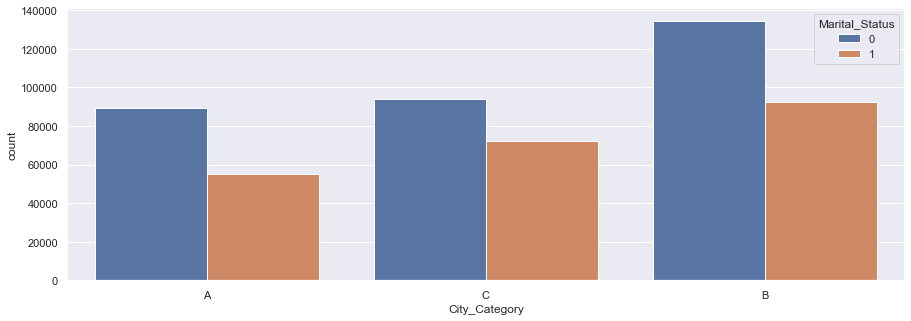

In [47]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Status'])

### 5.7) Purchasing distribution of married and unmarried individuals

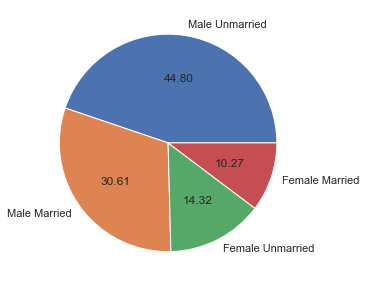

In [86]:
df_pr = df[df['Gender'] == 'M']
df_pr_M0 = df_pr[df_pr['Marital_Status'] == 0]

df_pr = df[df['Gender'] == 'M']
df_pr_M1 = df_pr[df_pr['Marital_Status'] == 1]

df_pr = df[df['Gender'] == 'F']
df_pr_F0 = df_pr[df_pr['Marital_Status'] == 0]

df_pr = df[df['Gender'] == 'F']
df_pr_F1 = df_pr[df_pr['Marital_Status'] == 1]


sizes  = [len(df_pr_M0)   ,  len(df_pr_M1),  len(df_pr_F0)    ,  len(df_pr_F1)  ]
labels = ['Male Unmarried', 'Male Married', 'Female Unmarried', 'Female Married']

plt.figure(figsize = (8,5))
plt.pie(sizes, labels = labels, autopct='%.2f')

plt.show()

### 5.8) Which Gender has purchased more in which city ?

<AxesSubplot:xlabel='City_Category', ylabel='count'>

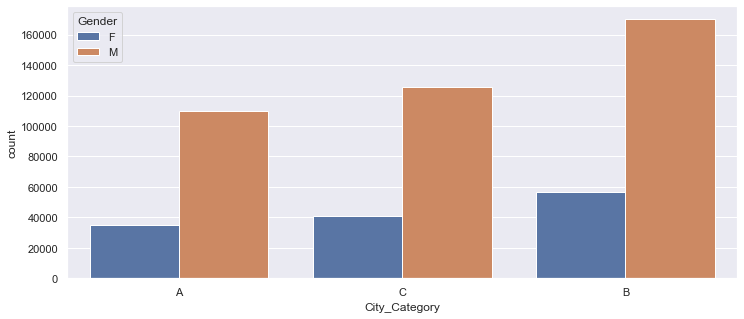

In [90]:
sns.set(rc = {'figure.figsize' : (12,5)})
sns.countplot(x = df['City_Category'], hue = df['Gender'])

### 5.8) Age and Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

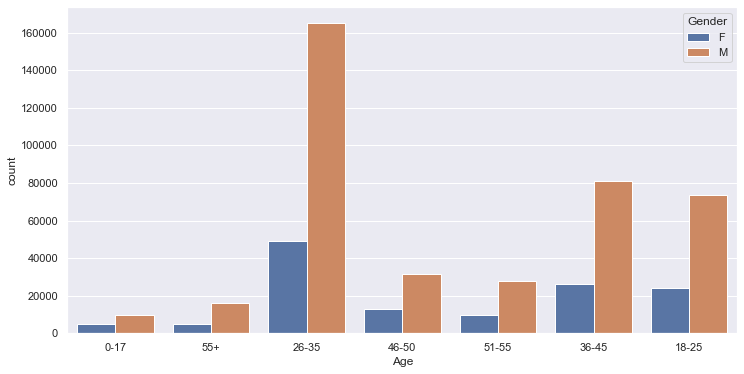

In [48]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = df['Age'], hue = df['Gender'])

### 5.9) Age and Marital Status

<AxesSubplot:xlabel='Age', ylabel='count'>

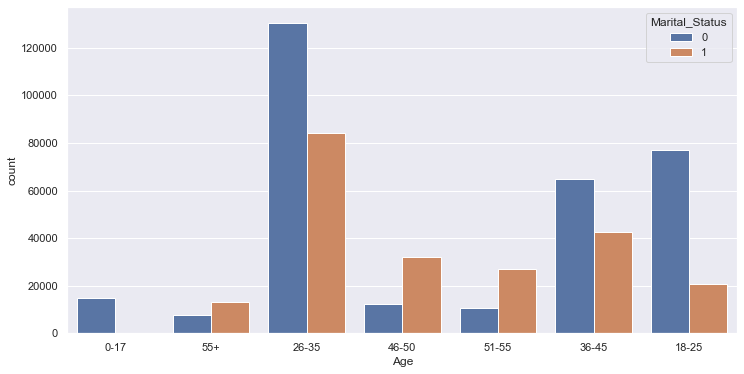

In [49]:
sns.set(rc = {'figure.figsize' : (12,6)})                                 # 0 - Unmarried
sns.countplot(x = df['Age'], hue = df['Marital_Status'])                  # 1 - Married

# 6. <u><font color = 'red'>Occupation and Products Analysis</u></font>

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

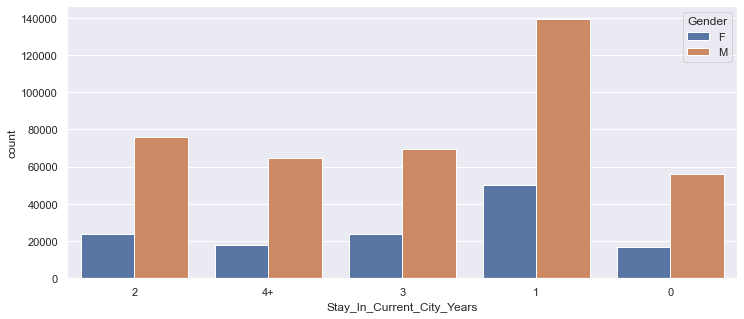

In [103]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Gender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

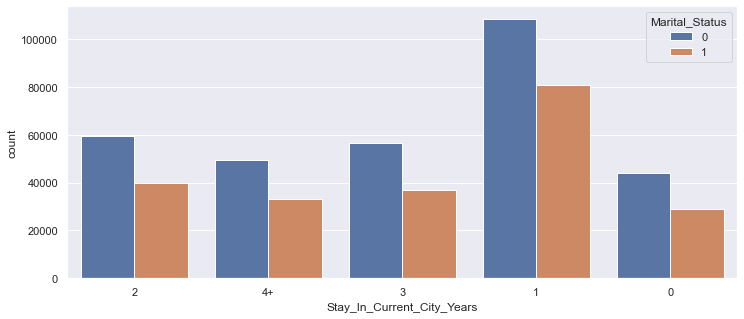

In [106]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Status'])

#### Conclusion - Target audience is Unmarried male residing from last 1 year

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

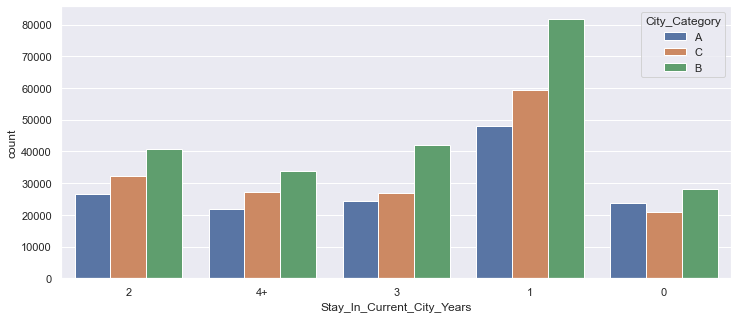

In [107]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['City_Category'])

#### Conclusion - Target audience is Unmarried male residing from last 1 year in City_Category B

### What %age of people are residing from how many years ?

<AxesSubplot:ylabel='None'>

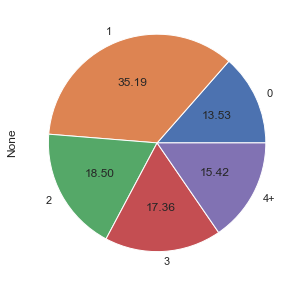

In [117]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%.2f')

### Which Occupation is buying maximum no. of products ?

<AxesSubplot:xlabel='Occupation'>

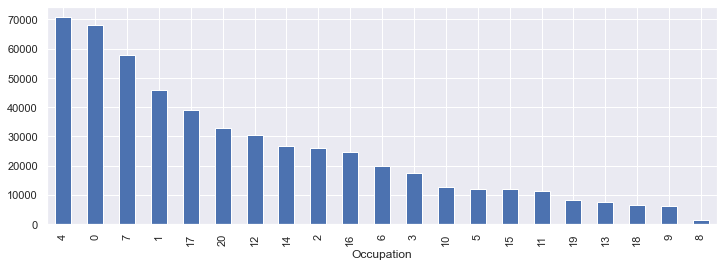

In [139]:
df.groupby('Occupation').size().sort_values(ascending = False).plot(kind    = 'bar', 
                                                                    figsize = (12,4))

### Which occupation is having more buying power ?

<AxesSubplot:xlabel='Occupation'>

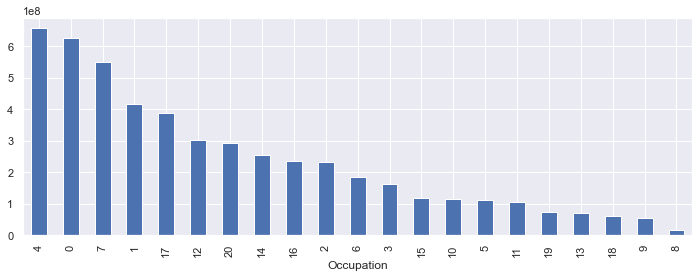

In [137]:
df.groupby('Occupation').sum()['Purchase'].sort_values(ascending = False).plot(kind    = 'bar', 
                                                                               figsize = (12,4))

### Which Occupation can buy most expensive products ?

<AxesSubplot:xlabel='Occupation'>

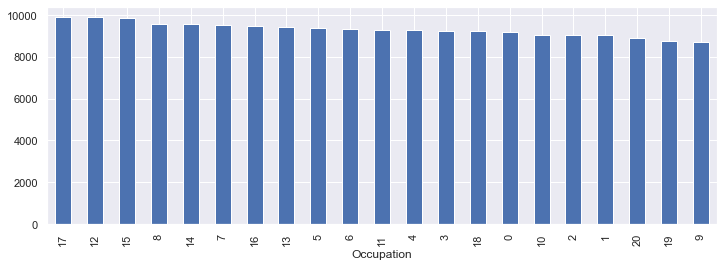

In [138]:
df.groupby('Occupation').mean()['Purchase'].sort_values(ascending = False).plot(kind    = 'bar', 
                                                                                figsize = (12,4))

### Male to Female distribution in each occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

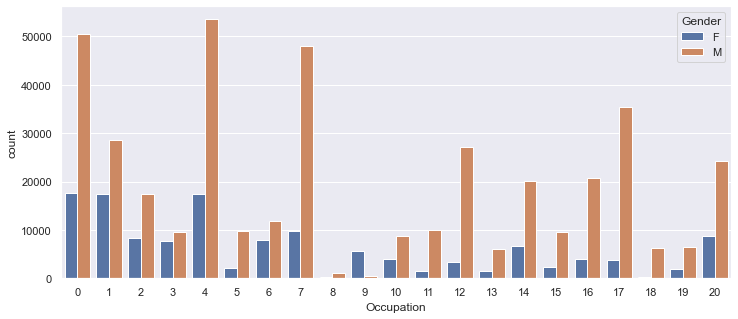

In [141]:
sns.countplot(x = df['Occupation'], hue = df['Gender'])

### Unique products people are buying from different occupation

In [11]:
df.groupby('Occupation').nunique()['Product_ID']

Occupation
0     3243
1     3020
2     2892
3     2657
4     3174
5     2344
6     2724
7     3070
8     1026
9     1820
10    2110
11    2235
12    2664
13    1946
14    2680
15    2168
16    2863
17    2831
18    2047
19    2303
20    3147
Name: Product_ID, dtype: int64

### Which products from the Product_Category_1 are most purchased ?

<AxesSubplot:xlabel='Product_Category_1'>

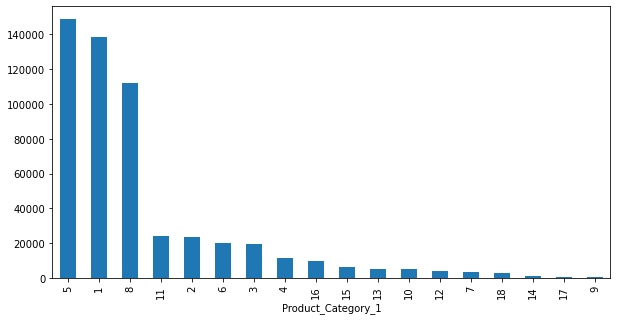

In [19]:
df.groupby('Product_Category_1').size().sort_values(ascending=False).plot( kind   = 'bar',
                                                                          figsize = (10,5))

### Which products from the Product_Category_1 are most expensive one ?

<AxesSubplot:xlabel='Product_Category_1'>

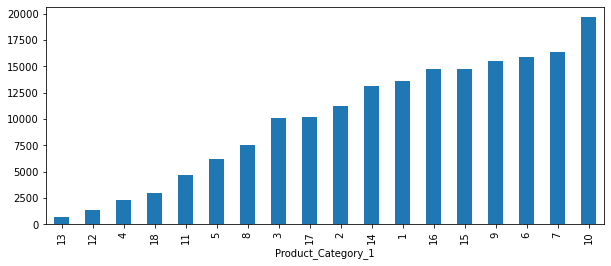

In [25]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot( kind   = 'bar', 
                                                                        figsize = (10,4))

### What are the products people purchsed most on ?

<AxesSubplot:xlabel='Product_ID'>

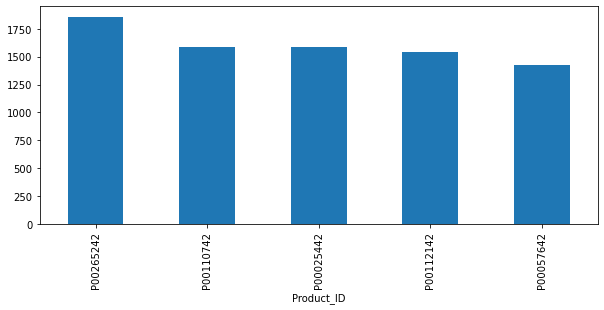

In [31]:
df.groupby('Product_ID').size().nlargest(5).plot( kind   = 'bar', 
                                                 figsize = (10,4))